In [ ]:
import pandas as pd
import math

In [ ]:
data=pd.read_csv('dataset_id3.csv')

In [ ]:
data

,outlook,temperature,humidity,wind,playtennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [ ]:
m=data.shape[0]
n=data.shape[1]

In [ ]:
class node: #to store a node of the decision tree
  def __init__(self):
    self.leaf=False
    self.label='x'
    self.next=[]
    self.decision_attribute='x'

In [ ]:
def entropy(l:list)->float: 
  """
    Input should be in the format [int, int]
  """
  if 0 in l:
    return 0
  p=l[0]/sum(l)
  return -1*(p * math.log2(p)+(1-p) * math.log2(1-p))

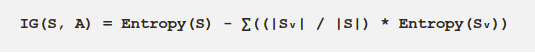

In [ ]:
def highest_gain(data:pd.DataFrame,m:int,n:int):
  """
  Input:last column is considered to be the target attribute
        m is number of rows in data
        n should be data.shape[1]-1
        last column of data should be the decision attribute
  Returns:index of the column in data wth highest information gain 
  """
  map=[]
  entropy_s=0
  f=False
  for i in range(n):
    yes=0
    no=0
    my_dict={}
    for j in range(m):
      if data.iloc[j][i] in my_dict:
        pass
      else:
        my_dict[data.iloc[j][i]]=[0, 0]
      if data.iloc[j][-1]=='yes':
        yes+=1
        my_dict[data.iloc[j][i]][0] += 1
      else:
        no+=1
        my_dict[data.iloc[j][i]][1] += 1
    map.append(my_dict)
    if not f:
      f=True
      entropy_s=entropy([yes, no])
  max_info_gain=-1
  max_info_gain_index=-1
  for v,i in enumerate(map):
    info_gain=entropy_s
    for j in i:
      info_gain=info_gain-(sum(i[j])/m) * entropy(i[j])
    if info_gain>max_info_gain:
      max_info_gain=info_gain
      max_info_gain_index=v
  return max_info_gain_index

In [ ]:
"""
  map[i] contains the unique values in column named i in the 'data' dataframe
  it is made global to avoid having to keep multiple copies of the same variable
"""
map={}
for i in data.columns:
  s=set()
  for j in range(m):
    s.add(data.loc[j,i])
  map[i]=s

In [ ]:
def id3(dataset:pd.DataFrame)->node:
  """
    input:dataframe
    returns:node
  """
  global map
  new_node=node()
  
  m=dataset.shape[0]
  n=dataset.shape[1]
  
  if dataset.iloc[:,-1].nunique()==1: #if all yes or no
    new_node.label='+' if dataset.iloc[0][-1]=='yes' else '-'
    new_node.leaf=True
    return new_node
  
  if n==1:#if no independent attribute
    new_node.leaf=True
    new_node.label='+' if dataset.iloc[:,-1].value_counts()[:1].index.tolist()[0]=='yes' else '-'
    return new_node
  
  a=highest_gain(dataset,m,n-1)
  
  A=dataset.columns.values.tolist()[a]
  new_node.decision_attribute=A
  for i in map[A]: 
    x=dataset.index[dataset[A] == i].values.tolist()
    
    if x==[]: #if no examples with df[A]=i
      new_dataset=dataset.copy()
      for j in range(n-1):
        new_dataset.drop(columns=new_dataset.columns[j], inplace=True)
      new_node.next.append(id3(new_dataset))
    else: #else
      new_dataset=dataset.copy()
      new_dataset.drop(new_dataset.index[new_dataset[A]!=i], inplace=True)
      new_dataset.drop(columns=A, inplace=True)
      new_node.next.append((id3(new_dataset),i))
  return new_node

In [ ]:
def test(root:node,instance:dict)->str:
  """
    Input:dictionary in format, instance[i] shold contain value for column named i
          and root node returned by id3
    returns:Classification of instance by the created decision tree
           + if yes, - if no, '-1' if value of an attribute i not recognized
  """
  if root.leaf:
    return root.label
  decision_attribute = instance[root.decision_attribute]
  for i in root.next:
    if i[1]==decision_attribute:
      return test(i[0], instance)
  return '-1'

In [ ]:
def val(root:node,df:pd.DataFrame)->dict:
  """
    input:dataframe to test on decision tree with root as it's root node
    returns:a dictionary with number of correct and incorrect classifications and total number of instances tested
  """
  m=df.shape[0]
  mismatch=0
  for i in range(m):
    instance={}
    for j in df.columns:
      instance[j]=df.loc[i,j]
    res=test(root,instance)
    if (data.iloc[i][-1]=='yes' and res=='-') or (data.iloc[i][-1]=='no' and res=='+'):
      mismatch+=1
  return {'incorrect_clasifications':mismatch, 'correct_classifications':(m-mismatch),'instances_tested':m}

In [ ]:
def print_tree(root:node):
  """
    Prints the structure of the decision tree, having 'root' as the root node, in DFS fashion
  """
  print([root.decision_attribute,root.leaf,root.label, [b[1] for b in root.next]])
  
  for i in root.next:
    print_tree(i[0])

In [ ]:
root=id3(data) #returns root node of the created decision tree

In [ ]:
print_tree(root)

['outlook', False, 'x', ['rain', 'sunny', 'overcast']]
['wind', False, 'x', ['strong', 'weak']]
['x', True, '-', []]
['x', True, '+', []]
['humidity', False, 'x', ['high', 'normal']]
['x', True, '-', []]
['x', True, '+', []]
['x', True, '+', []]


In [ ]:
val(root,data)

{'correct_classifications': 14,
 'incorrect_clasifications': 0,
 'instances_tested': 14}